In [1661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

<b>1.Read the data as an appropriate Time Series data and plot the data.

In [1662]:
dfs = pd.read_csv('Sparkling.csv', parse_dates = True, index_col = 'YearMonth')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1663]:
dfr = pd.read_csv('Rose.csv', parse_dates = True, index_col = 'YearMonth')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1664]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [1665]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


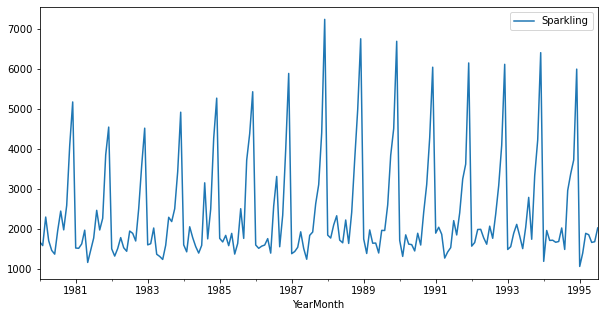

In [1666]:
rcParams['figure.figsize'] = 10, 5
dfs.plot()
plt.show()

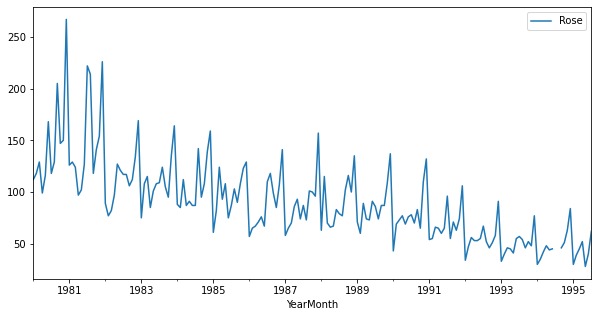

In [1667]:
rcParams['figure.figsize'] = 10, 5
dfr.plot()
plt.show()

<b>2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [1668]:
dfs.isnull().sum()

Sparkling    0
dtype: int64

In [1669]:
dfr.isnull().sum()

Rose    2
dtype: int64

In [1670]:
dfr=dfr.interpolate()
dfr.isnull().sum()

Rose    0
dtype: int64

In [1671]:
dfs.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [1672]:
dfr.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

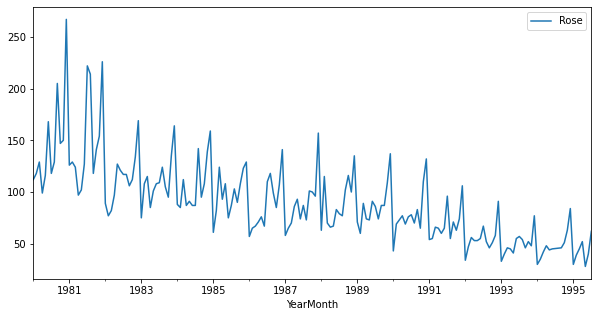

In [1673]:
rcParams['figure.figsize'] = 10, 5
dfr.plot()
plt.show()

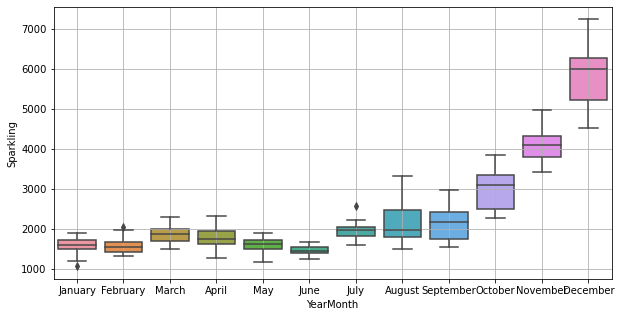

In [1674]:
sns.boxplot(x = dfs.index.month_name(),y = dfs['Sparkling'])
plt.grid();

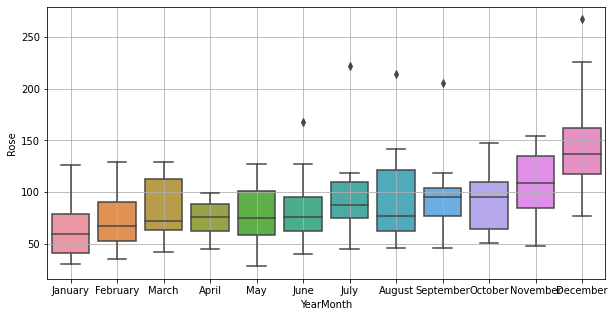

In [1675]:
sns.boxplot(x = dfr.index.month_name(),y = dfr['Rose'])
plt.grid();

<b> Decomposition of Sparkling wine 

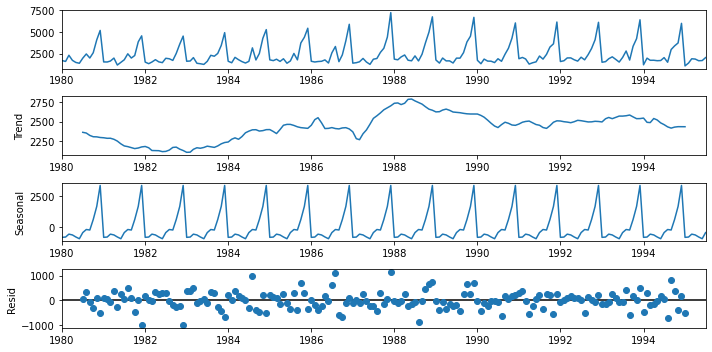

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
1980-06-01   -967.434011
1980-07-01   -465.502265
1980-08-01   -214.332821
1980-09-01   -254.677265
1980-10-01    599.769957
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290
Name: resid, dtype: float64 



In [1410]:
sparkling = seasonal_decompose(dfs, model='additive', period=12)
sparkling.plot()
plt.show()

trend = sparkling.trend
seasonality = sparkling.seasonal
residual = sparkling.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

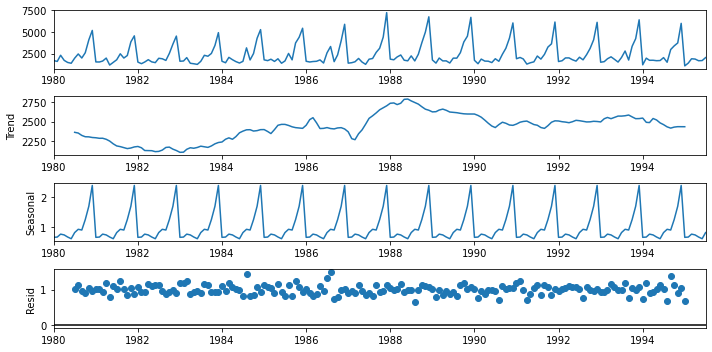

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
Name: resid, dtype: float64 



In [1411]:
sparkling = seasonal_decompose(dfs, model='multiplicative', period=12)
sparkling.plot()
plt.show()

trend = sparkling.trend
seasonality = sparkling.seasonal
residual = sparkling.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

<b>Decomposition of Rose wine

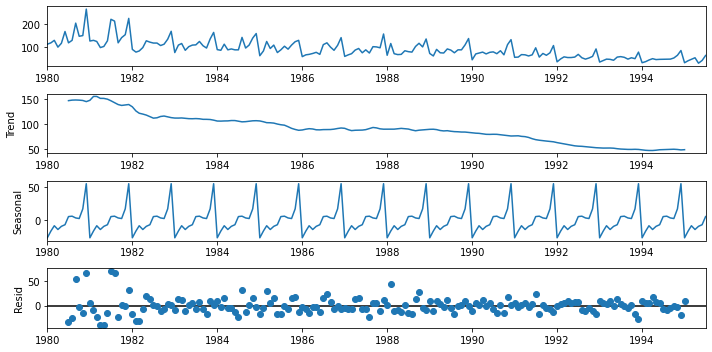

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
Name: resid, dtype: float64 



In [1412]:
rose = seasonal_decompose(dfr, model='additive', period=12)
rose.plot()
plt.show()

trend = rose.trend
seasonality = rose.seasonal
residual = rose.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

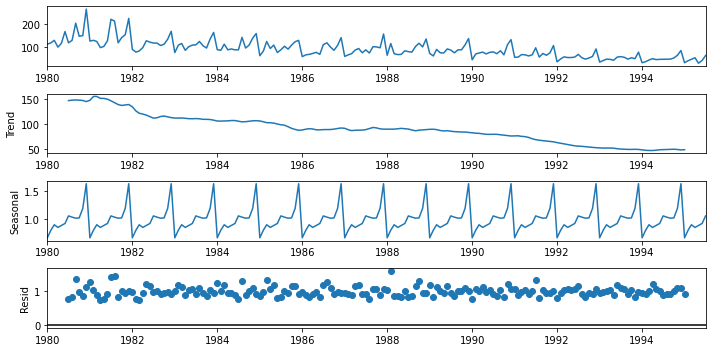

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
Name: resid, dtype: float64 



In [1413]:
rose = seasonal_decompose(dfr, model='multiplicative', period=12)
rose.plot()
plt.show()

trend = rose.trend
seasonality = rose.seasonal
residual = rose.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

<b>Check for stationarity of the whole Time Series data.

The hypothesis for the ADF test is:<br>
H0 : The Time Series has a unit root and is thus non-stationary.<br>
H1 : The Time Series does not have a unit root and is thus stationary.<br>

<b>Sparkling wine 

In [1676]:
dfstest = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [1677]:
dfstest = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


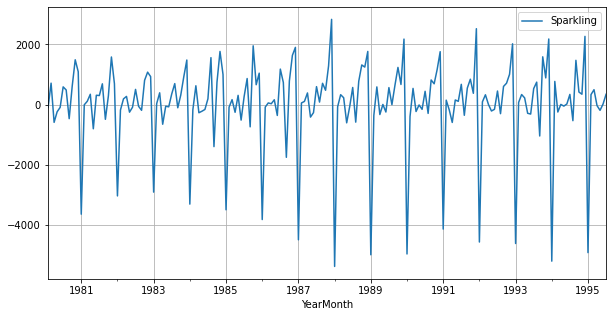

In [1678]:
dfs.diff().dropna().plot(grid=True);

<b>Rose wine

In [1417]:
dfrtest = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrtest[0])
print('DF test p-value is' ,dfrtest[1])
print('Number of lags used' ,dfrtest[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931433
Number of lags used 13


In [1418]:
dfrtest = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrtest[0])
print('DF test p-value is' ,dfrtest[1])
print('Number of lags used' ,dfrtest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115828316e-11
Number of lags used 12


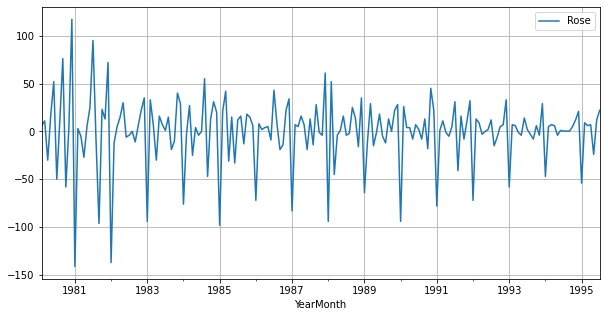

In [1419]:
dfr.diff().dropna().plot(grid=True);

<b>3. Split the data into training and test. The test data should start in 1991.

<b>Sparkling wine dataset

In [1679]:
strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [1680]:
print('Train -',strain.shape)
print('Test -',stest.shape)

Train - (132, 1)
Test - (55, 1)


In [1681]:
print('First 5 rows of Training Data')
display(strain.head())
print('Last 5 rows of Training Data')
display(strain.tail())
print('First 5 rows of Test Data')
display(stest.head())
print('Last 5 rows of Test Data')
display(stest.tail())

First 5 rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last 5 rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First 5 rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last 5 rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

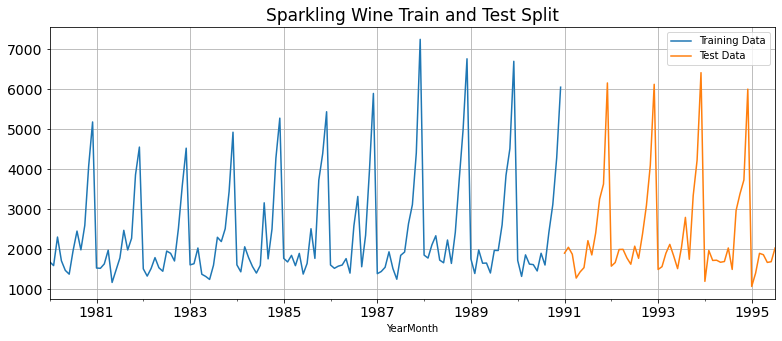

In [1682]:
strain['Sparkling'].plot(figsize=(13,5), fontsize=14)
stest['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Wine Train and Test Split', fontsize=17)
plt.show()

<b>Rose Wine Dataset

In [1683]:
rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [1684]:
print('Train -',rtrain.shape)
print('Test -',rtest.shape)

Train - (132, 1)
Test - (55, 1)


In [1685]:
print('First 5 rows of Training Data')
display(rtrain.head())
print('Last 5 rows of Training Data')
display(rtrain.tail())
print('First 5 rows of Test Data')
display(rtest.head())
print('Last 5 rows of Test Data')
display(rtest.tail())

First 5 rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last 5 rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First 5 rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last 5 rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

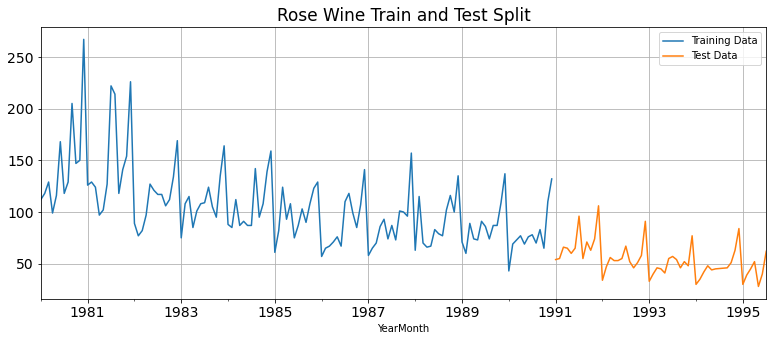

In [1686]:
rtrain['Rose'].plot(figsize=(13,5), fontsize=14)
rtest['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Wine Train and Test Split', fontsize=17)
plt.show()

<b>4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

<b>Sparkling wine dataset

<b>Model 1 - Linear Regression

In [1715]:
strain_time = [i+1 for i in range(len(strain))]
stest_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',strain_time)
print('Test Time instance','\n',stest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1716]:
LinearRegression_strain = strain.copy()
LinearRegression_stest = stest.copy()

In [1717]:
LinearRegression_strain['time'] = strain_time
LinearRegression_stest['time'] = stest_time

print('First few rows of Training Data')
display(LinearRegression_strain.head())
print('Last few rows of Training Data')
display(LinearRegression_strain.tail())
print('First few rows of Test Data')
display(LinearRegression_stest.head())
print('Last few rows of Test Data')
display(LinearRegression_stest.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [1718]:
lrs = LinearRegression()

In [1719]:
strain_predictions_model1         = lrs.predict(LinearRegression_strain[['time']])
LinearRegression_strain['RegOnTime'] = strain_predictions_model1

stest_predictions_model1         = lrs.predict(LinearRegression_stest[['time']])
LinearRegression_stest['RegOnTime'] = stest_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_stest['RegOnTime'], label='Regression On Time_Test Data for Sparkling wine')

plt.legend(loc='best')
plt.grid();

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [1720]:
rmse_model1_stest = metrics.mean_squared_error(stest['Sparkling'],stest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data on Sparkling wine dataset,  RMSE is %3.3f " %(rmse_model1_stest))

For RegressionOnTime forecast on the Test Data on Sparkling wine dataset,  RMSE is 1389.135 


In [1721]:
resultsDf_sparkling = pd.DataFrame({'Test RMSE': [rmse_model1_stest]},index=['Sparkling-LinearRegression'])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression  1389.135175

<b>Model 2 - Naive Approach

In [1722]:
NaiveModel_strain = strain.copy()
NaiveModel_stest = stest.copy()

In [1723]:
NaiveModel_stest['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_stest['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

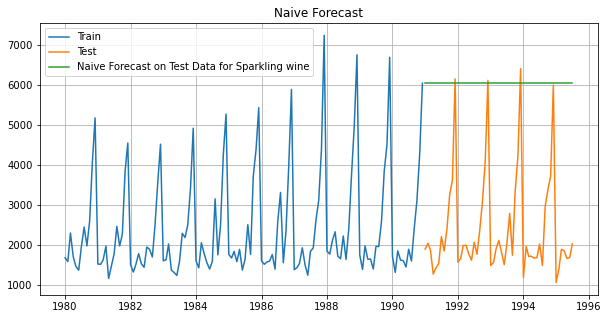

In [1724]:
plt.plot(NaiveModel_strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_stest['naive'], label='Naive Forecast on Test Data for Sparkling wine')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [1725]:
rmse_model2_stest = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_stest['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling wine,  RMSE is %3.3f" %(rmse_model2_stest))

For RegressionOnTime forecast on the Test Data for Sparkling wine,  RMSE is 3864.279


In [1726]:
resultsDf_2_sparkling = pd.DataFrame({'Test RMSE': [rmse_model2_stest]},index=['Sparkling-NaiveModel'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_2_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression  1389.135175
Sparkling-NaiveModel        3864.279352

<b>Model 3 - Simple Average

In [1727]:
SimpleAverage_strain = strain.copy()
SimpleAverage_stest = stest.copy()

In [1728]:
SimpleAverage_stest['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_stest.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

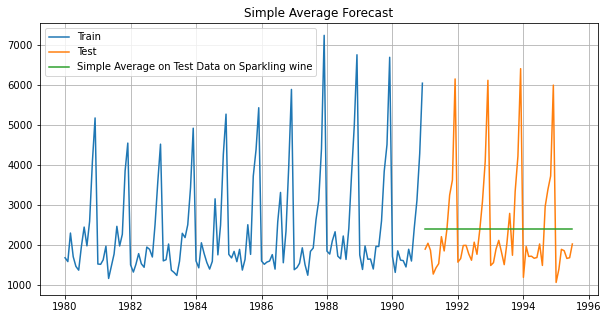

In [1729]:
plt.plot(SimpleAverage_strain['Sparkling'], label='Train')
plt.plot(SimpleAverage_stest['Sparkling'], label='Test')

plt.plot(SimpleAverage_stest['mean_forecast'], label='Simple Average on Test Data on Sparkling wine')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [1730]:
rmse_model3_stest = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_stest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data on Sparkling wine,  RMSE is %3.3f" %(rmse_model3_stest))

For Simple Average forecast on the Test Data on Sparkling wine,  RMSE is 1275.082


In [1731]:
resultsDf_3_sparkling = pd.DataFrame({'Test RMSE': [rmse_model3_stest]},index=['Sparkling-SimpleAverageModel'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_3_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression    1389.135175
Sparkling-NaiveModel          3864.279352
Sparkling-SimpleAverageModel  1275.081804

<b>Model 4 - Moving Average

In [1732]:
MovingAverages = dfs.copy()
MovingAverages.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1733]:
MovingAverages['Trailing_2'] = MovingAverages['Sparkling'].rolling(2).mean()
MovingAverages['Trailing_4'] = MovingAverages['Sparkling'].rolling(4).mean()
MovingAverages['Trailing_6'] = MovingAverages['Sparkling'].rolling(6).mean()
MovingAverages['Trailing_9'] = MovingAverages['Sparkling'].rolling(9).mean()

MovingAverages.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

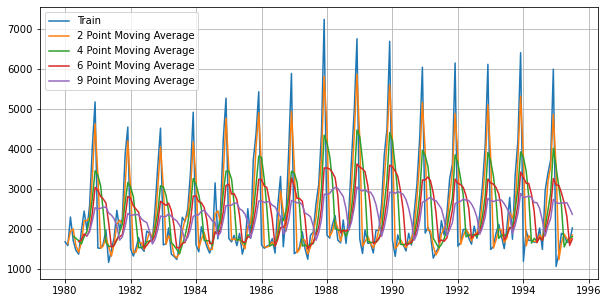

In [1734]:
plt.plot(MovingAverages['Sparkling'], label='Train')
plt.plot(MovingAverages['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverages['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverages['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverages['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [1735]:
trailing_MovingAverage_strain=MovingAverages[MovingAverages.index<'1991'] 
trailing_MovingAverage_stest=MovingAverages[MovingAverages.index>='1991']

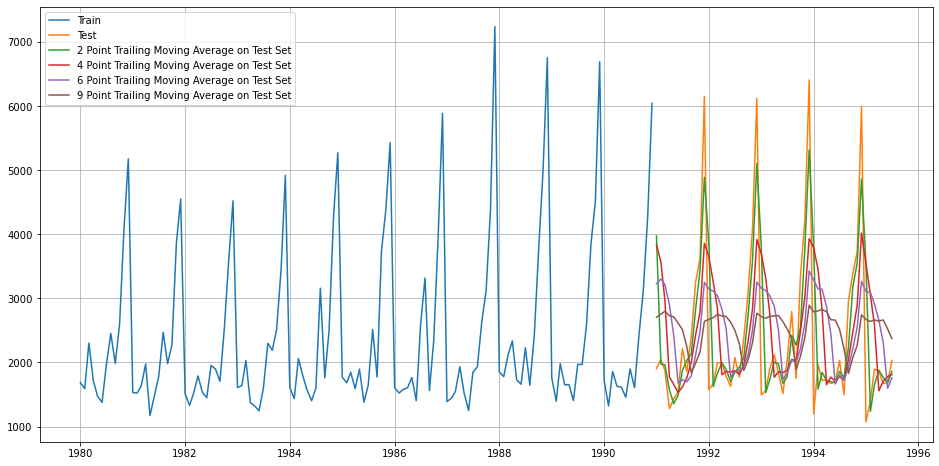

In [1736]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_strain['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_stest['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_stest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_stest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_stest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_stest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [1737]:
rmse_model4_stest_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_stest_2))

rmse_model4_stest_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_stest_4))

rmse_model4_stest_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_stest_6))

rmse_model4_stest_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_stest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_stest_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [1738]:
resultsDf_4_sparkling = pd.DataFrame({'Test RMSE': [rmse_model4_stest_2,rmse_model4_stest_4
                                          ,rmse_model4_stest_6,rmse_model4_stest_9]}
                           ,index=['Sparkling-2pointTrailingMovingAverage','Sparkling-4pointTrailingMovingAverage'
                                   ,'Sparkling-6pointTrailingMovingAverage','Sparkling-9pointTrailingMovingAverage'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_4_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression             1389.135175
Sparkling-NaiveModel                   3864.279352
Sparkling-SimpleAverageModel           1275.081804
Sparkling-2pointTrailingMovingAverage   813.400684
Sparkling-4pointTrailingMovingAverage  1156.589694
Sparkling-6pointTrailingMovingAverage  1283.927428
Sparkling-9pointTrailingMovingAverage  1346.278315

KeyError: 'RegOnTime'

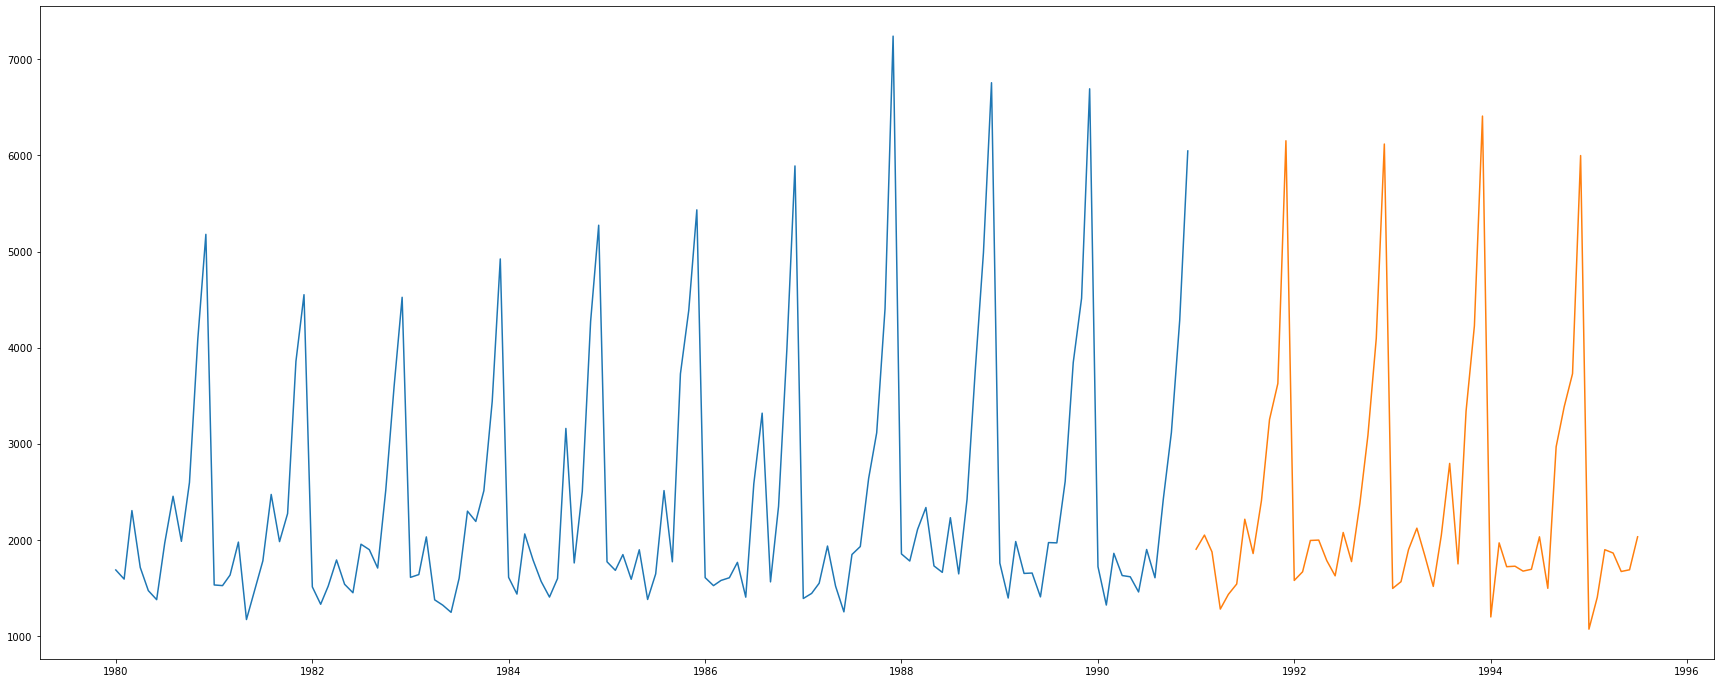

In [1739]:
plt.figure(figsize=(30,12))
plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(LinearRegression_stest['RegOnTime'], label='Linear Regression')

plt.plot(NaiveModel_stest['naive'], label='Naive Forecast')

plt.plot(SimpleAverage_stest['mean_forecast'], label='Simple Average')

plt.plot(trailing_MovingAverage_stest['Trailing_2'], label='2 Point Trailing Moving Average')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<b>Model 5 - Simple Exponential Smoothing

In [1740]:
SES_strain = strain.copy()
SES_stest = stest.copy()

In [1741]:
model_sSES = SimpleExpSmoothing(SES_strain['Sparkling'],initialization_method='estimated')

In [1742]:
model_sSES_autofit = model_sSES.fit(optimized=True)

In [1743]:
model_sSES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1744]:
SES_stest['Predict'] = model_sSES_autofit.forecast(steps=len(stest))
SES_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  2804.675124
1991-02-01       2049  2804.675124
1991-03-01       1874  2804.675124
1991-04-01       1279  2804.675124
1991-05-01       1432  2804.675124

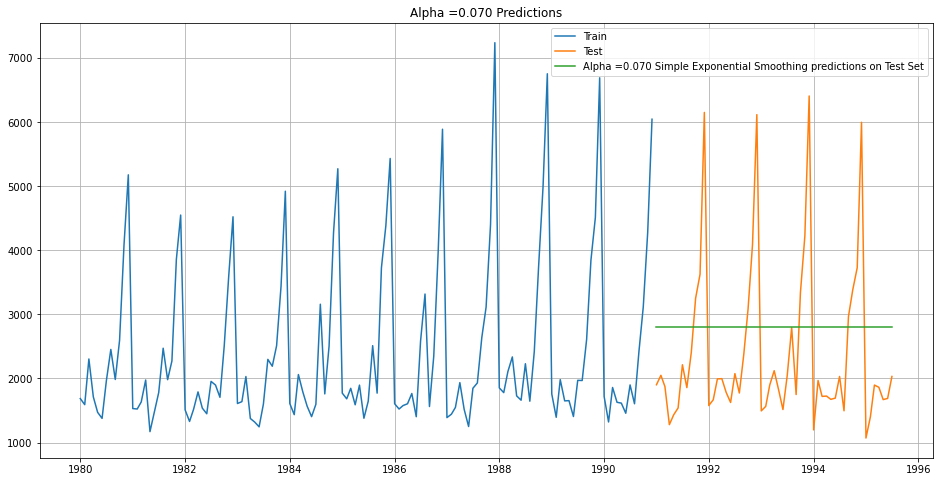

In [1745]:
plt.figure(figsize=(16,8))
plt.plot(SES_strain['Sparkling'], label='Train')
plt.plot(SES_stest['Sparkling'], label='Test')

plt.plot(SES_stest['Predict'], label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.070 Predictions');

In [1746]:
rmse_model5_stest = metrics.mean_squared_error(SES_stest['Sparkling'],SES_stest['Predict'],squared=False)
print("Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_stest))

Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1338.008


In [1747]:
resultsDf_5_sparkling = pd.DataFrame({'Test RMSE': [rmse_model5_stest]},index=['Sparkling-SimpleExponentialSmoothing-Alpha=0.070'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_5_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                        1389.135175
Sparkling-NaiveModel                              3864.279352
Sparkling-SimpleAverageModel                      1275.081804
Sparkling-2pointTrailingMovingAverage              813.400684
Sparkling-4pointTrailingMovingAverage             1156.589694
Sparkling-6pointTrailingMovingAverage             1283.927428
Sparkling-9pointTrailingMovingAverage             1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070  1338.008384

<b>Method 6: Double Exponential Smoothing (Holt's Model)

In [1462]:
DES_strain = strain.copy()
DES_stest = stest.copy()

In [1463]:
model_sDES = Holt(DES_strain,initialization_method='estimated')
model_sDES_fit = model_sDES.fit(optimized=True)

In [1464]:
model_sDES_fit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1465]:
DES_stest['Predict'] = model_sDES_fit.forecast(steps=len(DES_stest))
DES_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  5401.733026
1991-02-01       2049  5476.005230
1991-03-01       1874  5550.277433
1991-04-01       1279  5624.549637
1991-05-01       1432  5698.821840

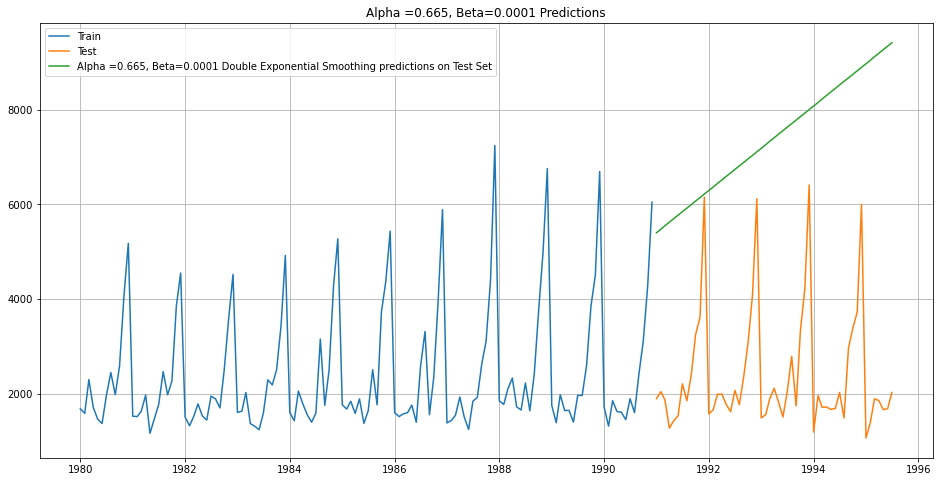

In [1466]:
plt.figure(figsize=(16,8))
plt.plot(DES_strain['Sparkling'], label='Train')
plt.plot(DES_stest['Sparkling'], label='Test')

plt.plot(DES_stest['Predict'], label='Alpha =0.665, Beta=0.0001 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.665, Beta=0.0001 Predictions');

In [1467]:
rmse_model6_stest = metrics.mean_squared_error(DES_stest['Sparkling'],DES_stest['Predict'],squared=False)
print("Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_stest))

Double Exponential Smoothing Model forecast on the Test Data, RMSE is 5291.880


In [1468]:
resultsDf_6_sparkling = pd.DataFrame({'Test RMSE': [rmse_model6_stest]},index=['Sparkling-DoubleExponentialSmoothing-Alpha=0.665,Beta=0.0001'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_6_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-DoubleExponentialSmoothing-Alpha=0.66...  5291.879833

<b>Model 7:Triple Exponential Smoothing (Holt - Winter's Model)

In [1469]:
TES_strain = strain.copy()
TES_stest = stest.copy()

In [1470]:
model_sTES = ExponentialSmoothing(TES_strain['Sparkling'], trend='additive', seasonal='additive')
model_sTES = model_sTES.fit(optimized=True)

In [1748]:
model_sTES.params

{'smoothing_level': 0.11235974440805609,
 'smoothing_trend': 0.03742154913668688,
 'smoothing_seasonal': 0.4932616459048464,
 'damping_trend': nan,
 'initial_level': 1640.2806120050896,
 'initial_trend': -3.261533670070838,
 'initial_seasons': array([  45.86595538,  -48.96808341,  662.32406973,   73.10075169,
        -168.81341007, -262.13208801,  326.10174942,  813.36401315,
         344.51476989,  956.12012048, 2446.68553948, 3538.12189099]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1749]:
TES_stest['Predict'] = model_sTES.forecast(steps=len(TES_stest))
TES_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  1474.966680
1991-02-01       2049  1169.991432
1991-03-01       1874  1658.920133
1991-04-01       1279  1504.953983
1991-05-01       1432  1417.648032

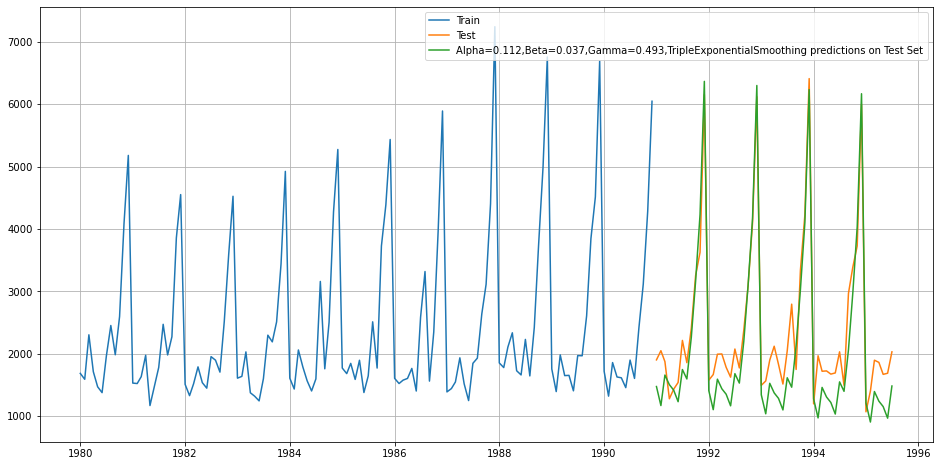

In [1750]:
plt.figure(figsize=(16,8))
plt.plot(TES_strain['Sparkling'], label='Train')
plt.plot(TES_stest['Sparkling'], label='Test')

plt.plot(TES_stest['Predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [1751]:
rmse_model7_stest = metrics.mean_squared_error(TES_stest['Sparkling'],TES_stest['Predict'],squared=False)
print("For Alpha=0.112,Beta=0.037,Gamma=0.493, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_stest))

For Alpha=0.112,Beta=0.037,Gamma=0.493, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 473.152


In [1752]:
resultsDf_7_sparkling = pd.DataFrame({'Test RMSE': [rmse_model7_stest]}
                           ,index=['Sparkling-TripleExponentialSmoothing-Alpha=0.112,Beta=0.037,Gamma=0.493'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_7_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417

In [1753]:
TES_strain_mult = strain.copy()
TES_stest_mult = stest.copy()

In [1754]:
model_sTES_mult = ExponentialSmoothing(TES_strain_mult['Sparkling'], trend='add', seasonal='multiplicative')
model_sTES_mult = model_sTES_mult.fit(optimized=True)

In [1755]:
model_sTES_mult.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1756]:
TES_stest_mult['Predict'] = model_sTES_mult.forecast(steps=len(TES_stest_mult))
TES_stest_mult.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  1577.224489
1991-02-01       2049  1333.677558
1991-03-01       1874  1745.945679
1991-04-01       1279  1630.411925
1991-05-01       1432  1523.289070

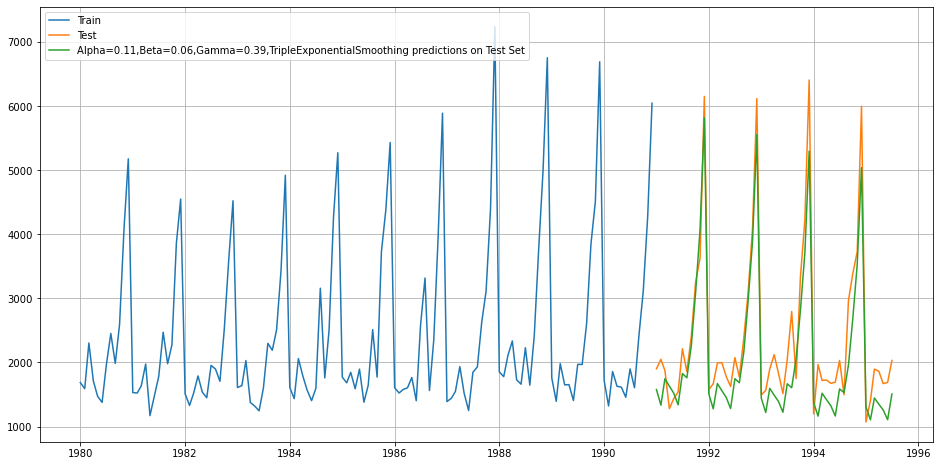

In [1757]:
plt.figure(figsize=(16,8))
plt.plot(TES_strain_mult['Sparkling'], label='Train')
plt.plot(TES_stest_mult['Sparkling'], label='Test')

plt.plot(TES_stest_mult['Predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [1758]:
rmse_model7_stest_mult = metrics.mean_squared_error(TES_stest_mult['Sparkling'],TES_stest_mult['Predict'],squared=False)
print("For Alpha=0.11,Beta=0.06,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_stest_mult))

For Alpha=0.11,Beta=0.06,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 469.768


In [1759]:
resultsDf_7_sparkling_mult = pd.DataFrame({'Test RMSE': [rmse_model7_stest_mult]}
                           ,index=['Sparkling-TripleExponentialSmoothing-Alpha=0.11,Beta=0.06,Gamma=0.39'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_7_sparkling_mult])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970

<b>Rose wine dataset

<b>Model 1 - Linear Regression

In [1853]:
rtrain_time = [i+1 for i in range(len(rtrain))]
rtest_time = [i+133 for i in range(len(rtest))]
print('Training Time instance','\n',rtrain_time)
print('Test Time instance','\n',rtest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1854]:
LinearRegression_rtrain = rtrain.copy()
LinearRegression_rtest = rtest.copy()

In [1855]:
LinearRegression_rtrain['time'] = rtrain_time
LinearRegression_rtest['time'] = rtest_time

print('First few rows of Training Data')
display(LinearRegression_rtrain.head())
print('Last few rows of Training Data')
display(LinearRegression_rtrain.tail())
print('First few rows of Test Data')
display(LinearRegression_rtest.head())
print('Last few rows of Test Data')
display(LinearRegression_rtest.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [1856]:
lrr = LinearRegression()

In [1857]:
lrr.fit(LinearRegression_rtrain[['time']],LinearRegression_rtrain['Rose'])

LinearRegression()

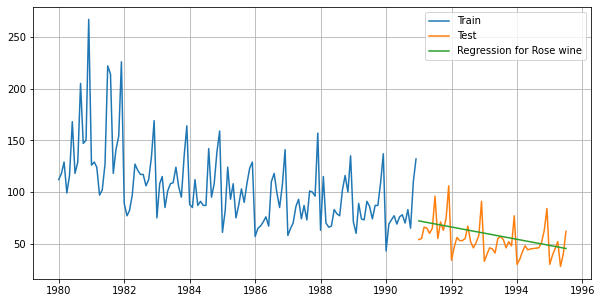

In [1858]:
rtrain_predictions_model1         = lrr.predict(LinearRegression_rtrain[['time']])
LinearRegression_rtrain['RegOnTime'] = rtrain_predictions_model1

rtest_predictions_model1         = lrr.predict(LinearRegression_rtest[['time']])
LinearRegression_rtest['RegOnTime'] = rtest_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression for Rose wine')

plt.legend(loc='best')
plt.grid();

In [1859]:
rmse_model1_rtest = metrics.mean_squared_error(rtest['Rose'],rtest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data on Rose wine dataset,  RMSE is %3.3f " %(rmse_model1_rtest))

For RegressionOnTime forecast on the Test Data on Rose wine dataset,  RMSE is 15.269 


In [1860]:
resultsDf_rose = pd.DataFrame({'Test RMSE': [rmse_model1_rtest]},index=['Rose-LinearRegression'])
resultsDf_rose

Test RMSE
Rose-LinearRegression  15.268955

<b>Model 2 - Naive Approach

In [1861]:
NaiveModel_rtrain = rtrain.copy()
NaiveModel_rtest = rtest.copy()

In [1862]:
NaiveModel_rtest['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_rtest['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

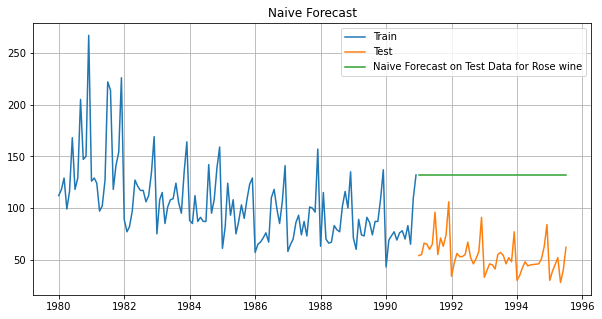

In [1863]:
plt.plot(NaiveModel_rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data for Rose wine')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [1864]:
rmse_model2_rtest = metrics.mean_squared_error(rtest['Rose'],NaiveModel_rtest['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose wine,  RMSE is %3.3f" %(rmse_model2_rtest))

For RegressionOnTime forecast on the Test Data for Rose wine,  RMSE is 79.719


In [1865]:
resultsDf_2_rose = pd.DataFrame({'Test RMSE': [rmse_model2_rtest]},index=['Rose-NaiveModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_2_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression  15.268955
Rose-NaiveModel        79.718773

<b>Model 3 - Simple Average

In [1866]:
SimpleAverage_rtrain = rtrain.copy()
SimpleAverage_rtest = rtest.copy()

In [1867]:
SimpleAverage_rtest['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_rtest.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

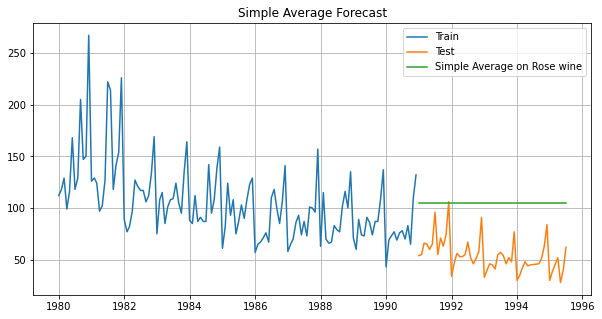

In [1868]:
plt.plot(SimpleAverage_rtrain['Rose'], label='Train')
plt.plot(SimpleAverage_rtest['Rose'], label='Test')

plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Rose wine')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [1869]:
rmse_model3_rtest = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_rtest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data on Rose wine, RMSE is %3.3f" %(rmse_model3_rtest))

For Simple Average forecast on the Test Data on Rose wine, RMSE is 53.461


In [1870]:
resultsDf_3_rose = pd.DataFrame({'Test RMSE': [rmse_model3_rtest]},index=['Rose-SimpleAverageModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_3_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression    15.268955
Rose-NaiveModel          79.718773
Rose-SimpleAverageModel  53.460570

<b>Model 4 - Moving Average

In [1871]:
MovingAverager = dfr.copy()
MovingAverager.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1872]:
MovingAverager['Trailing_2'] = MovingAverager['Rose'].rolling(2).mean()
MovingAverager['Trailing_4'] = MovingAverager['Rose'].rolling(4).mean()
MovingAverager['Trailing_6'] = MovingAverager['Rose'].rolling(6).mean()
MovingAverager['Trailing_9'] = MovingAverager['Rose'].rolling(9).mean()

MovingAverager.head(12)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN
1980-08-01  129.0       123.5      132.75  126.500000         NaN
1980-09-01  205.0       167.0      155.00  139.166667  132.666667
1980-10-01  147.0       176.0      149.75  147.166667  136.555556
1980-11-01  150.0       148.5      157.75  152.833333  140.111111
1980-12-01  267.0       208.5      192.25  169.333333  155.444444

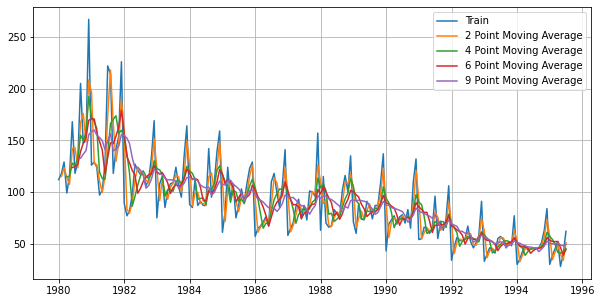

In [1873]:
plt.plot(MovingAverager['Rose'], label='Train')
plt.plot(MovingAverager['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverager['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverager['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverager['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [1874]:
trailing_MovingAverage_rtrain=MovingAverager[MovingAverager.index<'1991'] 
trailing_MovingAverage_rtest=MovingAverager[MovingAverager.index>='1991']

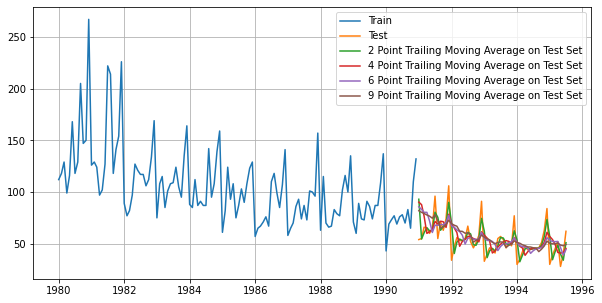

In [1875]:
plt.plot(trailing_MovingAverage_rtrain['Rose'], label='Train')
plt.plot(trailing_MovingAverage_rtest['Rose'], label='Test')


plt.plot(trailing_MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rtest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [1876]:
rmse_model4_rtest_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_2))

rmse_model4_rtest_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_4))

rmse_model4_rtest_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_6))

rmse_model4_rtest_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_rtest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_rtest_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [1877]:
resultsDf_4_rose = pd.DataFrame({'Test RMSE': [rmse_model4_rtest_2,rmse_model4_rtest_4
                                          ,rmse_model4_rtest_6,rmse_model4_rtest_9]}
                           ,index=['Rose-2pointTrailingMovingAverage','Rose-4pointTrailingMovingAverage'
                                   ,'Rose-6pointTrailingMovingAverage','Rose-9pointTrailingMovingAverage'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_4_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression             15.268955
Rose-NaiveModel                   79.718773
Rose-SimpleAverageModel           53.460570
Rose-2pointTrailingMovingAverage  11.529278
Rose-4pointTrailingMovingAverage  14.451403
Rose-6pointTrailingMovingAverage  14.566327
Rose-9pointTrailingMovingAverage  14.727630

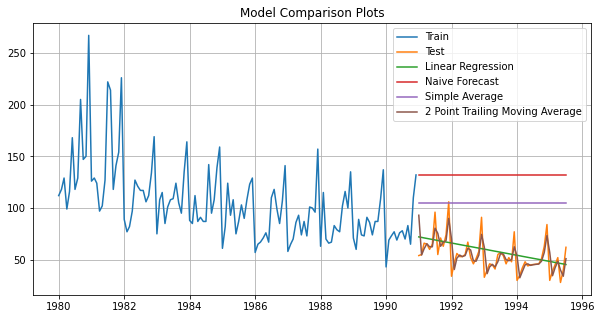

In [1878]:
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(LinearRegression_rtest['RegOnTime'], label='Linear Regression')

plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast')

plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average')

plt.plot(trailing_MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<b>Model 5 - Simple Exponential Smoothing

In [1879]:
SES_rtrain = rtrain.copy()
SES_rtest = rtest.copy()

In [1880]:
model_rSES = SimpleExpSmoothing(SES_rtrain['Rose'],initialization_method='estimated')

In [1881]:
model_rSES_autofit = model_rSES.fit(optimized=True)

In [1882]:
model_rSES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1883]:
SES_rtest['Predict'] = model_rSES_autofit.forecast(steps=len(rtest))
SES_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  87.104997
1991-02-01  55.0  87.104997
1991-03-01  66.0  87.104997
1991-04-01  65.0  87.104997
1991-05-01  60.0  87.104997

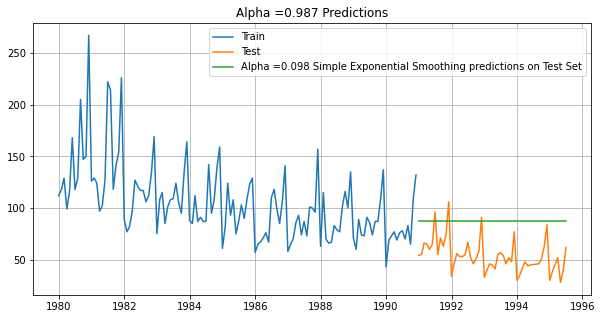

In [1884]:
plt.plot(SES_rtrain['Rose'], label='Train')
plt.plot(SES_rtest['Rose'], label='Test')

plt.plot(SES_rtest['Predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.987 Predictions');

In [1885]:
rmse_model5_rtest = metrics.mean_squared_error(SES_rtest['Rose'],SES_rtest['Predict'],squared=False)
print("Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_rtest))

Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [1886]:
resultsDf_5_rose = pd.DataFrame({'Test RMSE': [rmse_model5_rtest]},index=['Rose-SimpleExponentialSmoothing-Alpha=0.098'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_5_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                        15.268955
Rose-NaiveModel                              79.718773
Rose-SimpleAverageModel                      53.460570
Rose-2pointTrailingMovingAverage             11.529278
Rose-4pointTrailingMovingAverage             14.451403
Rose-6pointTrailingMovingAverage             14.566327
Rose-9pointTrailingMovingAverage             14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098  36.796241

<b>Method 6: Double Exponential Smoothing (Holt's Model)

In [1887]:
DES_rtrain = rtrain.copy()
DES_rtest = rtest.copy()

In [1888]:
model_rDES = Holt(DES_rtrain,initialization_method='estimated')
model_rDES_fit = model_rDES.fit(optimized=True)

In [1889]:
model_rDES_fit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1890]:
DES_rtest['Predict'] = model_rDES_fit.forecast(steps=len(DES_rtest))
DES_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  72.063238
1991-02-01  55.0  71.568859
1991-03-01  66.0  71.074481
1991-04-01  65.0  70.580103
1991-05-01  60.0  70.085725

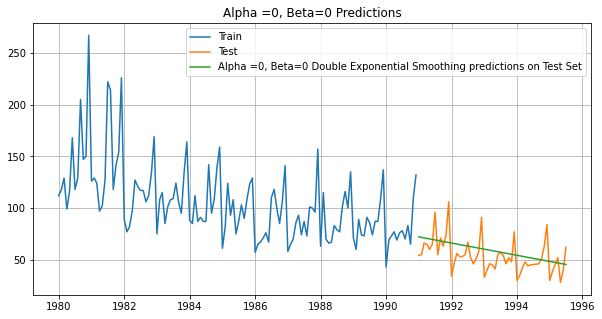

In [1891]:
plt.plot(DES_rtrain['Rose'], label='Train')
plt.plot(DES_rtest['Rose'], label='Test')

plt.plot(DES_rtest['Predict'], label='Alpha =0, Beta=0 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0, Beta=0 Predictions');

In [1892]:
rmse_model6_rtest = metrics.mean_squared_error(DES_rtest['Rose'],DES_rtest['Predict'],squared=False)
print("Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_rtest))

Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.269


In [1893]:
resultsDf_6_rose = pd.DataFrame({'Test RMSE': [rmse_model6_rtest]},index=['Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_6_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                           15.268955
Rose-NaiveModel                                 79.718773
Rose-SimpleAverageModel                         53.460570
Rose-2pointTrailingMovingAverage                11.529278
Rose-4pointTrailingMovingAverage                14.451403
Rose-6pointTrailingMovingAverage                14.566327
Rose-9pointTrailingMovingAverage                14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098     36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0  15.268944

<b>Model 7:Triple Exponential Smoothing (Holt - Winter's Model)

In [1894]:
TES_rtrain = rtrain.copy()
TES_rtest = rtest.copy()

In [1895]:
model_rTES = ExponentialSmoothing(TES_rtrain['Rose'], trend='additive', seasonal='multiplicative')
model_rTES = model_rTES.fit(optimized=True)

In [1896]:
model_rTES.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1897]:
TES_rtest['Predict'] = model_rTES.forecast(steps=len(TES_rtest))
TES_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  56.689174
1991-02-01  55.0  64.129166
1991-03-01  66.0  69.856436
1991-04-01  65.0  60.877474
1991-05-01  60.0  68.237072

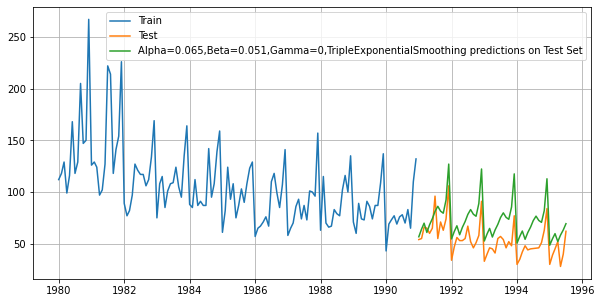

In [1898]:
plt.plot(TES_rtrain['Rose'], label='Train')
plt.plot(TES_rtest['Rose'], label='Test')

plt.plot(TES_rtest['Predict'], label='Alpha=0.065,Beta=0.051,Gamma=0,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [1899]:
rmse_model7_rtest = metrics.mean_squared_error(TES_rtest['Rose'],TES_rtest['Predict'],squared=False)
print("For Alpha=0.065,Beta=0.051,Gamma=3.879, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_rtest))

For Alpha=0.065,Beta=0.051,Gamma=3.879, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 21.020


In [1900]:
resultsDf_7_rose = pd.DataFrame({'Test RMSE': [rmse_model7_rtest]}
                           ,index=['Rose-TripleExponentialSmoothing-Alpha=0.065,Beta=0.051,Gamma=0'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_7_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620

In [1901]:
TES_rtrain_additive = rtrain.copy()
TES_rtest_additive = rtest.copy()

In [1902]:
model_rTES_additive = ExponentialSmoothing(TES_rtrain['Rose'], trend='additive', seasonal='additive')
model_rTES_additive = model_rTES_additive.fit(optimized=True)

In [1903]:
model_rTES_additive.params

{'smoothing_level': 0.08485622209289158,
 'smoothing_trend': 0.0005280630369796539,
 'smoothing_seasonal': 0.006764526794519119,
 'damping_trend': nan,
 'initial_level': 77.31958915163194,
 'initial_trend': -0.5501794952033382,
 'initial_seasons': array([ 38.63205024,  50.94041582,  59.06227683,  48.26306762,
         57.05566819,  62.6629802 ,  72.54958097,  78.56552615,
         74.62626287,  72.65336605,  90.54607132, 133.36580632]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1904]:
TES_rtest_additive['Predict'] = model_rTES_additive.forecast(steps=len(TES_rtest_additive))
TES_rtest_additive.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  42.605820
1991-02-01  55.0  54.376558
1991-03-01  66.0  61.934184
1991-04-01  65.0  50.608812
1991-05-01  60.0  58.838643

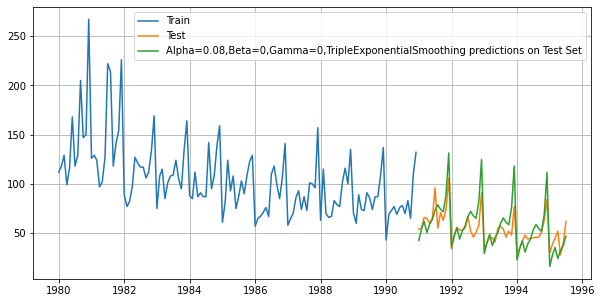

In [1905]:
plt.plot(TES_rtrain_additive['Rose'], label='Train')
plt.plot(TES_rtest_additive['Rose'], label='Test')

plt.plot(TES_rtest_additive['Predict'], label='Alpha=0.08,Beta=0,Gamma=0,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [1906]:
rmse_model7_rtest_add = metrics.mean_squared_error(TES_rtest_additive['Rose'],TES_rtest_additive['Predict'],squared=False)
print("For Alpha=0.08,Beta=0,Gamma=0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_rtest_add))

For Alpha=0.08,Beta=0,Gamma=0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 14.257


In [1907]:
resultsDf_7_rose_add = pd.DataFrame({'Test RMSE': [rmse_model7_rtest_add]}
                           ,index=['Rose-TripleExponentialSmoothing-Alpha=0.08,Beta=0,Gamma=0'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_7_rose_add])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122

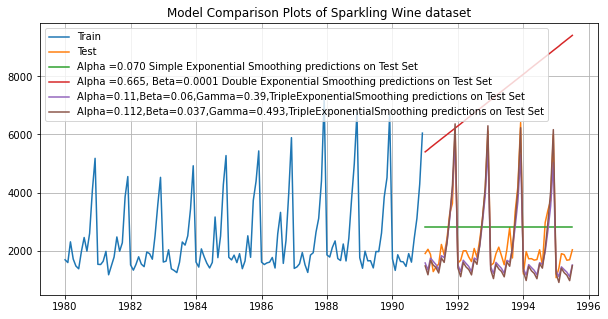

In [1908]:
plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(SES_stest['Predict'], label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_stest['Predict'], label='Alpha =0.665, Beta=0.0001 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_stest_mult['Predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_stest['Predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots of Sparkling Wine dataset")
plt.grid();

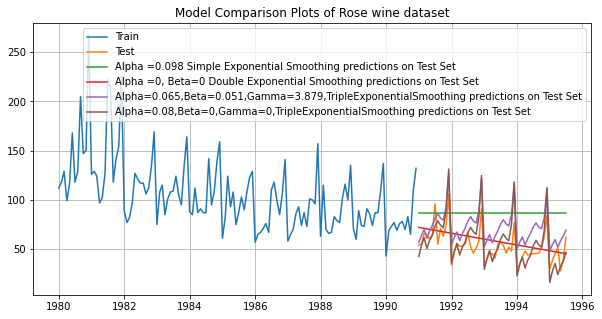

In [1909]:
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(SES_rtest['Predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_rtest['Predict'], label='Alpha =0, Beta=0 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_rtest['Predict'], label='Alpha=0.065,Beta=0.051,Gamma=3.879,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_rtest_additive['Predict'], label='Alpha=0.08,Beta=0,Gamma=0,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots of Rose wine dataset")
plt.grid();

<b>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The hypothesis for the ADF test is:<br>
<br>
H0 : The Time Series has a unit root and is thus non-stationary.<br>
H1 : The Time Series does not have a unit root and is thus stationary.<br>

<b>Sparkling wine

In [1540]:
dfstest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


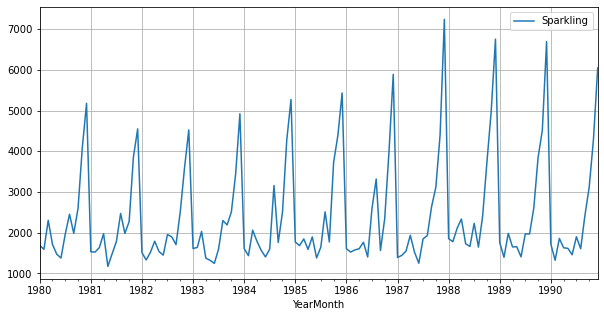

In [1541]:
strain.plot(grid=True);

In [1542]:
dfstest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


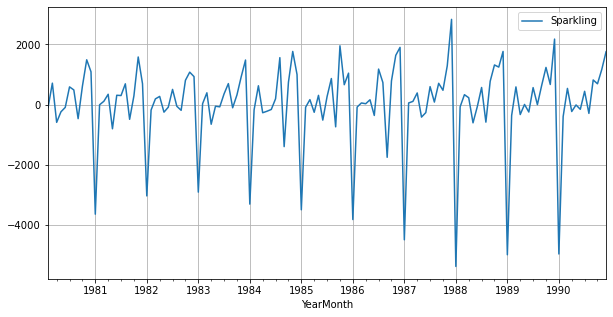

In [1543]:
strain.diff().dropna().plot(grid=True);

In [1544]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


<b>Rose wine

In [1910]:
dfrtest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dfrtest[0])
print('DF test p-value is' ,dfrtest[1])
print('Number of lags used' ,dfrtest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


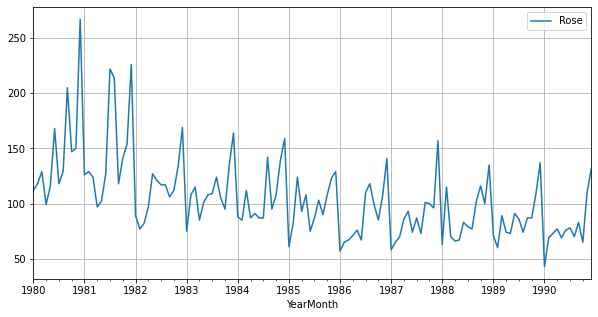

In [1911]:
rtrain.plot(grid=True);

In [1912]:
dfrtest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrtest[0])
print('DF test p-value is' ,dfrtest[1])
print('Number of lags used' ,dfrtest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


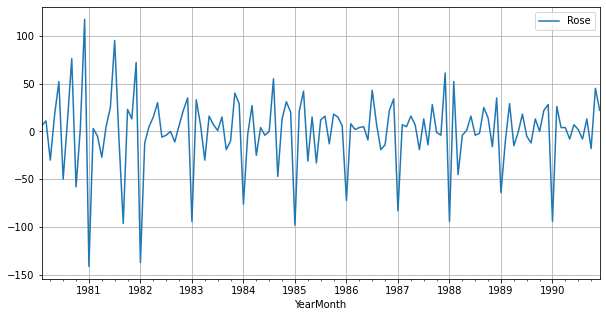

In [1913]:
rtrain.diff().dropna().plot(grid=True);

In [1914]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


<b>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [1550]:
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


<b>Sparkling wine - ARIMA

In [1551]:
arima_aic_strain = strain.copy()
arima_aic_stest = stest.copy()

In [1552]:
ARIMA_AIC_Sparkling = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_Sparkling

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1553]:
for param in pdq:
    ARIMA_model_sparkling = ARIMA(arima_aic_strain['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_sparkling.aic))
    ARIMA_AIC_Sparkling = ARIMA_AIC_Sparkling.append({'param':param, 'AIC': ARIMA_model_sparkling.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566
ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065
ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


In [1915]:
ARIMA_AIC_Sparkling.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.458954
14  (3, 1, 2)  2230.952333
11  (2, 1, 3)  2232.937076
9   (2, 1, 1)  2233.777626

In [1916]:
auto_ARIMA_sparkling = ARIMA(arima_aic_strain, order=(2,1,2))
auto_ARIMA_sparkling = auto_ARIMA_sparkling.fit()
print(auto_ARIMA_sparkling.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 10 Dec 2022   AIC                           2213.509
Time:                        15:56:06   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

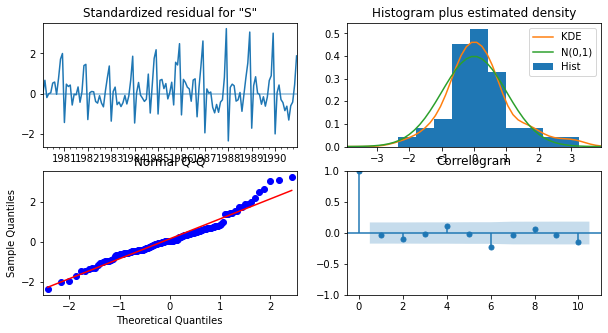

In [1917]:
auto_ARIMA_sparkling.plot_diagnostics();

In [1557]:
arima_aic_stest['Predict']=auto_ARIMA_sparkling.forecast(steps=len(arima_aic_stest))
arima_aic_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  4252.347924
1991-02-01       2049  2863.090133
1991-03-01       1874  2043.973171
1991-04-01       1279  1746.207340
1991-05-01       1432  1813.633672

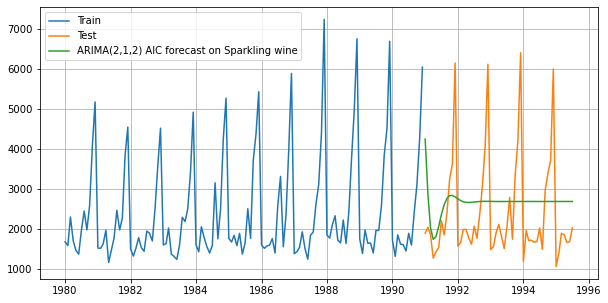

In [1918]:
plt.plot(arima_aic_strain['Sparkling'], label='Train')
plt.plot(arima_aic_stest['Sparkling'], label='Test')

plt.plot(arima_aic_stest['Predict'], label='ARIMA(2,1,2) AIC forecast on Sparkling wine')

plt.legend(loc='best')
plt.grid();

In [1919]:
rmse_model8_stest = metrics.mean_squared_error(arima_aic_stest['Sparkling'],arima_aic_stest['Predict'],squared=False)
print("For ARIMA(2,1,2) AIC forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_stest))

For ARIMA(2,1,2) AIC forecast on the Test Data, RMSE is 1299.980


In [1920]:
resultsDf_8_sparkling = pd.DataFrame({'Test RMSE': [rmse_model8_stest]}
                           ,index=['Sparkling-ARIMA(2,1,2) AIC'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_8_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970
Sparkling-ARIMA(2,1,2) AIC                          1299.979640

<b>Sparkling wine - SARIMA

In [1921]:
sarmia_strain = strain.copy()
sarima_stest = stest.copy()

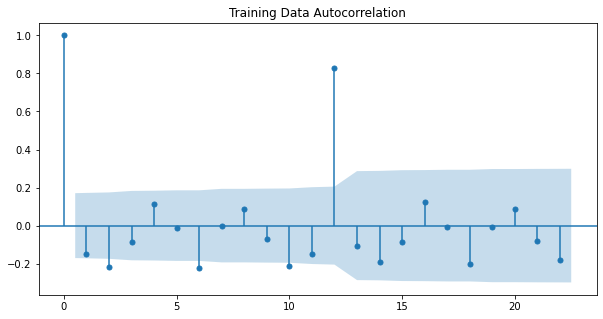

In [1922]:
plot_acf(sarmia_strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [1563]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [1564]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_sparkling

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1566]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(sarmia_strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
        SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7441.156431906364
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3742.8762259298555
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920801
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3758.958561092017
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064452
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2950.5228823053444
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2731.9211401178763
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089688
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857703485
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428646174457
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3607.9267130327803
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332720137
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221326617342
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.824132853828
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2847.3697975701025
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149359595
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372612883312
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432239847
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7350.942466338702
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931211306
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005734246855
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404034075916
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3412.6127364839986
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2273641149545
SARIMA(2, 1, 2

In [1567]:
SARIMA_AIC_sparkling.sort_values(by=['AIC']).head()

param       seasonal          AIC
146  (1, 1, 3)  (0, 0, 3, 12)    16.000000
82   (0, 1, 3)  (0, 0, 3, 12)   591.111768
283  (3, 1, 3)  (3, 0, 0, 12)  1387.497014
251  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
268  (3, 1, 2)  (3, 0, 1, 12)  1388.602616

In [1568]:
auto_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(sarmia_strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_sparkling = auto_SARIMA_sparkling.fit(maxiter=1000)
print(results_auto_SARIMA_sparkling.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Fri, 09 Dec 2022   AIC                           1387.788
Time:                                     15:34:30   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

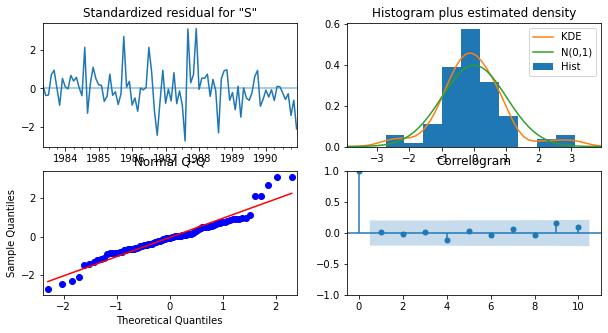

In [1923]:
results_auto_SARIMA_sparkling.plot_diagnostics();

In [1924]:
sarima_stest['Predict']=results_auto_SARIMA_sparkling.forecast(steps=len(sarima_stest))
sarima_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  1389.389859
1991-02-01       2049  1224.711540
1991-03-01       1874  1673.368665
1991-04-01       1279  1533.368647
1991-05-01       1432  1426.008279

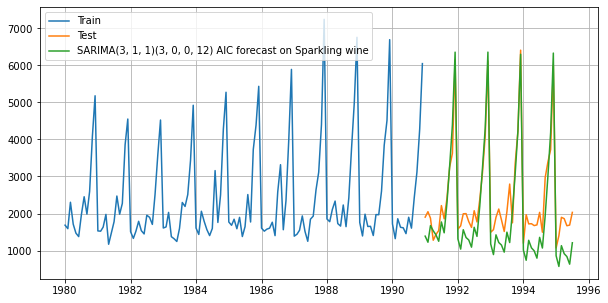

In [1925]:
plt.plot(sarmia_strain['Sparkling'], label='Train')
plt.plot(sarima_stest['Sparkling'], label='Test')

plt.plot(sarima_stest['Predict'], label='SARIMA(3, 1, 1)(3, 0, 0, 12) AIC forecast on Sparkling wine')

plt.legend(loc='best')
plt.grid();

In [1926]:
rmse_model9_stest = metrics.mean_squared_error(sarima_stest['Sparkling'],sarima_stest['Predict'],squared=False)
print("For SARIMA(3, 1, 1)(3, 0, 0, 12) AIC forecast on the Test Data, RMSE is %3.3f" %(rmse_model9_stest))

For SARIMA(3, 1, 1)(3, 0, 0, 12) AIC forecast on the Test Data, RMSE is 601.140


In [1573]:
resultsDf_9_sparkling = pd.DataFrame({'Test RMSE': [rmse_model9_stest]}
                           ,index=['Sparkling-SARIMA(3, 1, 1)(3, 0, 0, 12) AIC'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_9_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-DoubleExponentialSmoothing-Alpha=0.66...  5291.879833
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970
Sparkling-ARIMA(2,1,2) AIC                          1299.979640
Sparkling-SARIMA(3, 1, 1)(3, 0, 0, 12) AIC           601.140492

<b>Rose wine - ARIMA

In [1574]:
arima_aic_rtrain = rtrain.copy()
arima_aic_rtest = rtest.copy()

In [1575]:
ARIMA_AIC_Rose = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_Rose

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1576]:
for param in pdq:
    ARIMA_model_rose = ARIMA(arima_aic_rtrain['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_rose.aic))
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356
ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


In [1577]:
ARIMA_AIC_Rose.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695412
15  (3, 1, 3)  1278.667917
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [1578]:
auto_ARIMA_rose = ARIMA(arima_aic_rtrain, order=(2,1,3))
auto_ARIMA_rose = auto_ARIMA_rose.fit()
print(auto_ARIMA_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Fri, 09 Dec 2022   AIC                           1274.695
Time:                        15:34:35   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

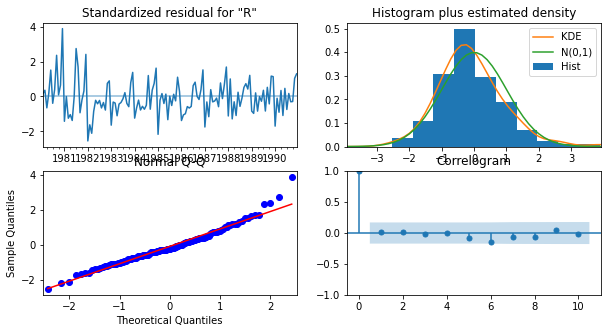

In [1579]:
auto_ARIMA_rose.plot_diagnostics();

In [1580]:
arima_aic_rtest['Predict']=auto_ARIMA_rose.forecast(steps=len(arima_aic_rtest))
arima_aic_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  85.595789
1991-02-01  55.0  90.535998
1991-03-01  66.0  81.967217
1991-04-01  65.0  92.746555
1991-05-01  60.0  80.902653

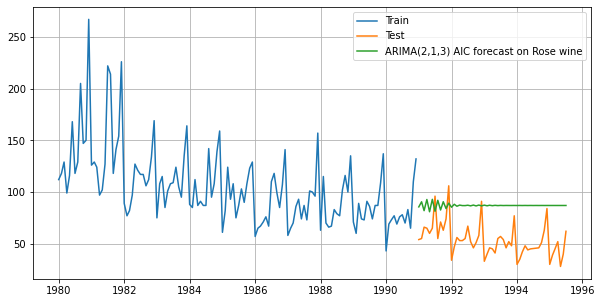

In [1927]:
plt.plot(arima_aic_rtrain['Rose'], label='Train')
plt.plot(arima_aic_rtest['Rose'], label='Test')

plt.plot(arima_aic_rtest['Predict'], label='ARIMA(2,1,3) AIC forecast on Rose wine')

plt.legend(loc='best')
plt.grid();

In [1582]:
rmse_model8_rtest = metrics.mean_squared_error(arima_aic_rtest['Rose'],arima_aic_rtest['Predict'],squared=False)
print("For ARIMA(2,1,3) AIC forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_rtest))

For ARIMA(2,1,3) AIC forecast on the Test Data, RMSE is 36.813


In [1583]:
resultsDf_8_rose = pd.DataFrame({'Test RMSE': [rmse_model8_rtest]}
                           ,index=['Rose-ARIMA(2,1,3) AIC'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_8_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122
Rose-ARIMA(2,1,3) AIC                               36.812984

<b>Rose wine - SARIMA

In [1584]:
sarima_rtrain = rtrain.copy()
sarima_rtest = rtest.copy()

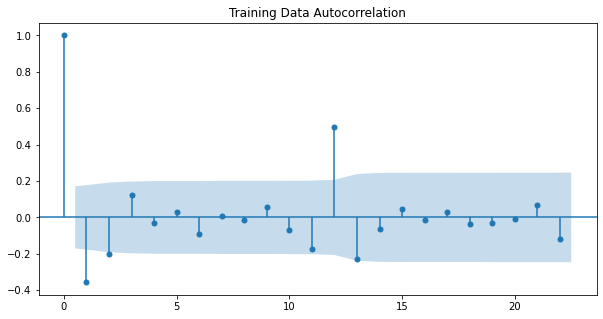

In [1585]:
plot_acf(sarima_rtrain.diff(),title='Training Data Autocorrelation',missing='drop');

In [1586]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [1587]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1588]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5718.421796606624
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753448
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3923.111981743881
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3735.47970250528
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127558
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3463.5988181011626
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2,

SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286772
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3023.3509150271693
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886524745
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117738038
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311108079
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5693.447859540391
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488809099
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171182936432
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 

In [1589]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880934
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [1590]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Fri, 09 Dec 2022   AIC                            774.400
Time:                                         15:40:32   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

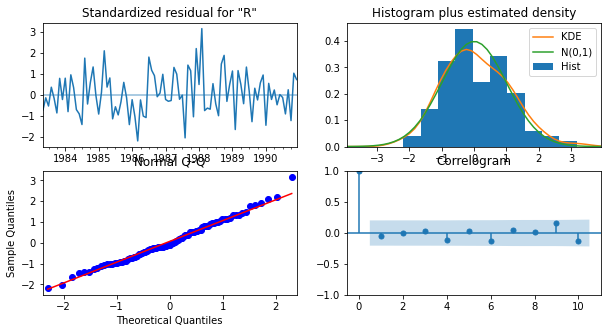

In [1591]:
results_auto_SARIMA_rose.plot_diagnostics();

In [1592]:
sarima_rtest['Predict']=results_auto_SARIMA_rose.forecast(steps=len(sarima_rtest))
sarima_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  55.235168
1991-02-01  55.0  68.122949
1991-03-01  66.0  67.908680
1991-04-01  65.0  66.786167
1991-05-01  60.0  69.760116

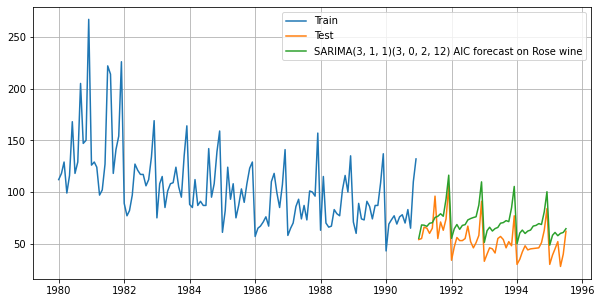

In [1928]:
plt.plot(sarima_rtrain['Rose'], label='Train')
plt.plot(sarima_rtest['Rose'], label='Test')

plt.plot(sarima_rtest['Predict'], label='SARIMA(3, 1, 1)(3, 0, 2, 12) AIC forecast on Rose wine')

plt.legend(loc='best')
plt.grid();

In [1594]:
rmse_model9_rtest = metrics.mean_squared_error(sarima_rtest['Rose'],sarima_rtest['Predict'],squared=False)
print("For SARIMA(3, 1, 1)(3, 0, 2, 12) AIC forecast on the Test Data, RMSE is %3.3f" %(rmse_model9_rtest))

For SARIMA(3, 1, 1)(3, 0, 2, 12) AIC forecast on the Test Data, RMSE is 18.882


In [1595]:
resultsDf_9_rose = pd.DataFrame({'Test RMSE': [rmse_model9_rtest]}
                           ,index=['Rose-SARIMA(3, 1, 1)(3, 0, 2, 12) AIC'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_9_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122
Rose-ARIMA(2,1,3) AIC                               36.812984
Rose-SARIMA(3, 1, 1)(3, 0, 2, 12) AIC               18.881910

<b>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

<b>Sparkling wine - ARIMA

In [1596]:
arima_strain = strain.copy()
arima_stest = stest.copy()

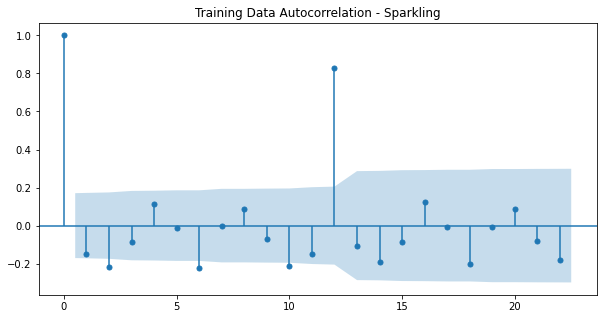

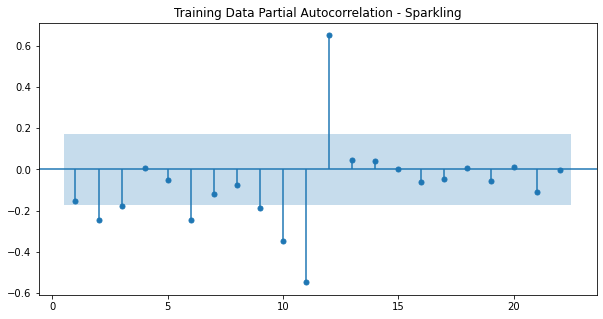

In [1597]:
plot_acf(arima_strain.diff(),title='Training Data Autocorrelation - Sparkling',missing='drop')
plot_pacf(arima_strain.diff().dropna(),title='Training Data Partial Autocorrelation - Sparkling',zero=False,method='ywmle');

In [1598]:
manual_ARIMA_sparkling = ARIMA(arima_strain['Sparkling'], order=(0,1,0))
results_manual_ARIMA_sparkling = manual_ARIMA_sparkling.fit()
print(results_manual_ARIMA_sparkling.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Fri, 09 Dec 2022   AIC                           2267.663
Time:                        15:40:33   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

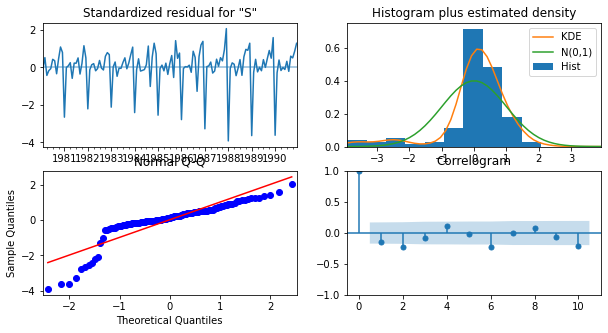

In [1599]:
results_manual_ARIMA_sparkling.plot_diagnostics();

In [1600]:
arima_stest['Predict']=results_manual_ARIMA_sparkling.forecast(steps=len(arima_stest))
arima_stest.head()

Sparkling  Predict
YearMonth                     
1991-01-01       1902   6047.0
1991-02-01       2049   6047.0
1991-03-01       1874   6047.0
1991-04-01       1279   6047.0
1991-05-01       1432   6047.0

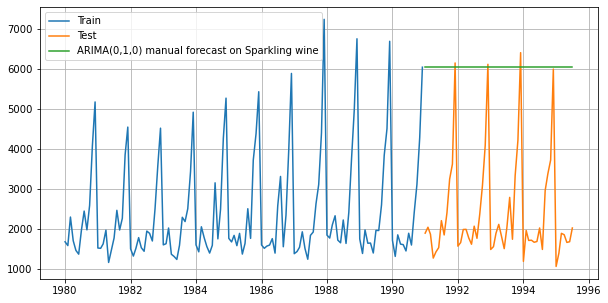

In [1929]:
plt.plot(arima_strain['Sparkling'], label='Train')
plt.plot(arima_stest['Sparkling'], label='Test')

plt.plot(arima_stest['Predict'], label='ARIMA(0,1,0) manual forecast on Sparkling wine')

plt.legend(loc='best')
plt.grid();

In [1602]:
rmse_model10_stest = metrics.mean_squared_error(arima_stest['Sparkling'],arima_stest['Predict'],squared=False)
print("For ARIMA(0,1,0) manual forecast on the Test Data, RMSE is %3.3f" %(rmse_model10_stest))

For ARIMA(0,1,0) manual forecast on the Test Data, RMSE is 3864.279


In [1603]:
resultsDf_10_sparkling = pd.DataFrame({'Test RMSE': [rmse_model10_stest]}
                           ,index=['Sparkling-ARIMA(0,1,0) manual'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_10_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-DoubleExponentialSmoothing-Alpha=0.66...  5291.879833
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970
Sparkling-ARIMA(2,1,2) AIC                          1299.979640
Sparkling-SARIMA(3, 1, 1)(3, 0, 0, 12) AIC           601.140492
Sparkling-ARIMA(0,1,0) manual                       3864.279352

<b>Sparkling wine - SARIMA 

In [1604]:
sarmia_manual_strain = strain.copy()
sarima_manual_stest = stest.copy()

In [1605]:
manual_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(sarmia_manual_strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_sparkling = manual_SARIMA_sparkling.fit(maxiter=1000)
print(results_manual_SARIMA_sparkling.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Fri, 09 Dec 2022   AIC                           1288.607
Time:                                         15:40:37   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

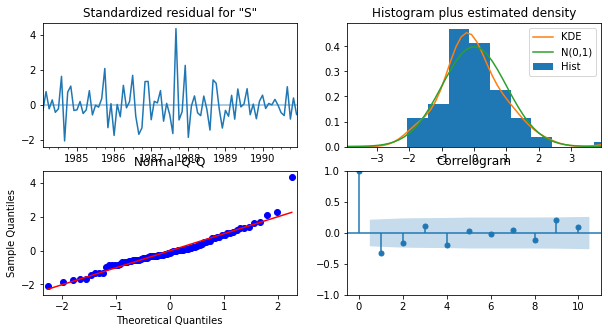

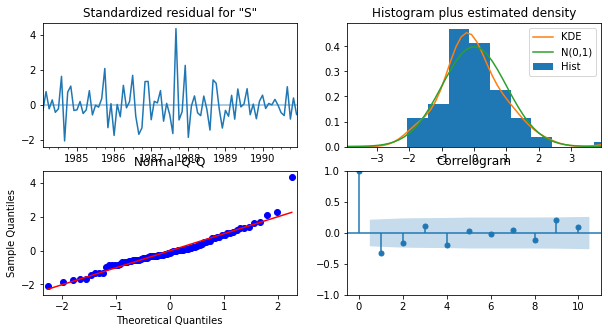

In [1606]:
results_manual_SARIMA_sparkling.plot_diagnostics()

In [1607]:
sarima_manual_stest['Predict']=results_manual_SARIMA_sparkling.forecast(steps=len(sarima_manual_stest))
sarima_manual_stest.head()

Sparkling      Predict
YearMonth                         
1991-01-01       1902  1040.228298
1991-02-01       2049   634.425891
1991-03-01       1874  1154.251926
1991-04-01       1279  1052.466827
1991-05-01       1432  1013.973305

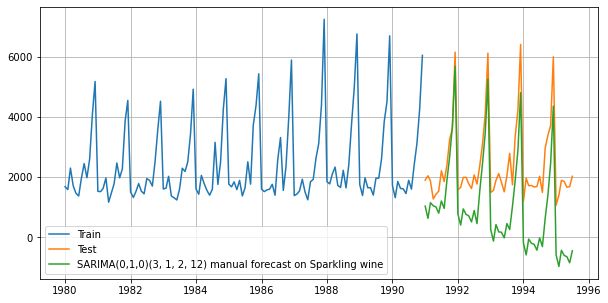

In [1930]:
plt.plot(sarmia_manual_strain['Sparkling'], label='Train')
plt.plot(sarima_manual_stest['Sparkling'], label='Test')

plt.plot(sarima_manual_stest['Predict'], label='SARIMA(0,1,0)(3, 1, 2, 12) manual forecast on Sparkling wine')

plt.legend(loc='best')
plt.grid();

In [1609]:
rmse_model11_stest = metrics.mean_squared_error(sarima_manual_stest['Sparkling'],sarima_manual_stest['Predict'],squared=False)
print("For SARIMA(0,1,0)(3, 1, 2, 12) manual forecast on the Test Data, RMSE is %3.3f" %(rmse_model11_stest))

For SARIMA(0,1,0)(3, 1, 2, 12) manual forecast on the Test Data, RMSE is 1551.646


In [1610]:
resultsDf_11_sparkling = pd.DataFrame({'Test RMSE': [rmse_model9_stest]}
                           ,index=['Sparkling-SARIMA(0,1,0)(3, 1, 2, 12) manual'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_11_sparkling])
resultsDf_sparkling

Test RMSE
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-DoubleExponentialSmoothing-Alpha=0.66...  5291.879833
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970
Sparkling-ARIMA(2,1,2) AIC                          1299.979640
Sparkling-SARIMA(3, 1, 1)(3, 0, 0, 12) AIC           601.140492
Sparkling-ARIMA(0,1,0) manual                       3864.279352
Sparkling-SARIMA(0,1,0)(3, 1, 2, 12) manual          601.140492

<b>Rose wine - ARIMA

In [1611]:
arima_rtrain1 = rtrain.copy()
arima_rtest1 = rtest.copy()

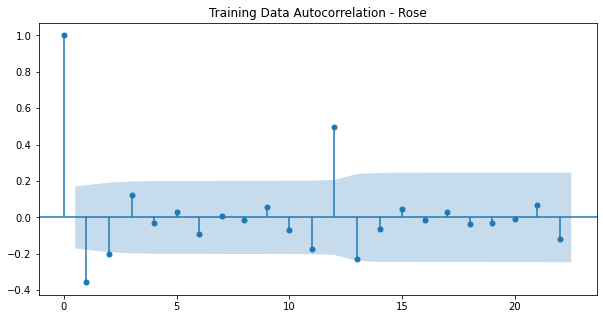

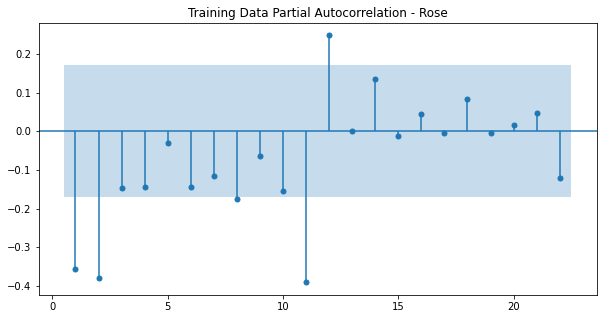

In [1612]:
plot_acf(arima_rtrain1.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(arima_rtrain1.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [1613]:
manual_ARIMA_rose1 = ARIMA(arima_rtrain1['Rose'], order=(2,1,2))
results_manual_ARIMA_rose1 = manual_ARIMA_rose1.fit()
print(results_manual_ARIMA_rose1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Fri, 09 Dec 2022   AIC                           1281.871
Time:                        15:40:40   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

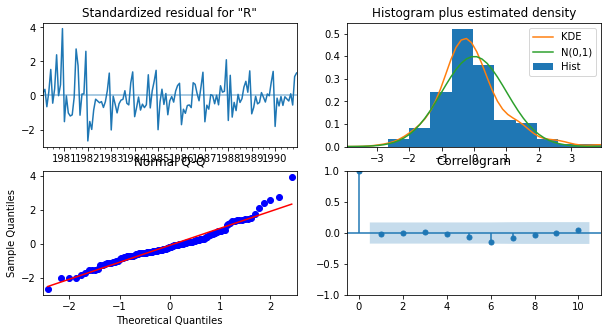

In [1614]:
results_manual_ARIMA_rose1.plot_diagnostics();

In [1615]:
arima_rtest1['Predict']=results_manual_ARIMA_rose1.forecast(steps=len(arima_rtest1))
arima_rtest1.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  91.159512
1991-02-01  55.0  85.314628
1991-03-01  66.0  87.962468
1991-04-01  65.0  86.759563
1991-05-01  60.0  87.306038

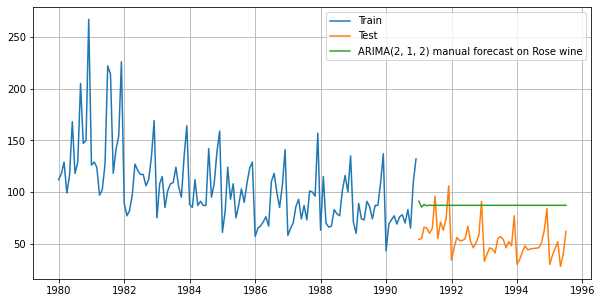

In [1931]:
plt.plot(arima_rtrain1['Rose'], label='Train')
plt.plot(arima_rtest1['Rose'], label='Test')

plt.plot(arima_rtest1['Predict'], label='ARIMA(2, 1, 2) manual forecast on Rose wine')

plt.legend(loc='best')
plt.grid();

In [1617]:
rmse_model10_rtest1 = metrics.mean_squared_error(arima_rtest1['Rose'],arima_rtest1['Predict'],squared=False)
print("For ARIMA(2,1,2) manual forecast on the Test Data, RMSE is %3.3f" %(rmse_model10_rtest1))

For ARIMA(2,1,2) manual forecast on the Test Data, RMSE is 36.871


In [1618]:
resultsDf_10_rose1 = pd.DataFrame({'Test RMSE': [rmse_model10_rtest1]}
                           ,index=['Rose-ARIMA(2,1,2) manual'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_10_rose1])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122
Rose-ARIMA(2,1,3) AIC                               36.812984
Rose-SARIMA(3, 1, 1)(3, 0, 2, 12) AIC               18.881910
Rose-ARIMA(2,1,2) manual                            36.871197

<b>Rose wine - SARIMA

In [1619]:
sarima_manual_rtrain = rtrain.copy()
sarima_manual_rtest = rtest.copy()

In [1620]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(sarima_manual_rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Fri, 09 Dec 2022   AIC                            689.786
Time:                                    15:40:50   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.403      1.760      0.078      -0.081       1.499
ar.L2         -0.1501      0.176   

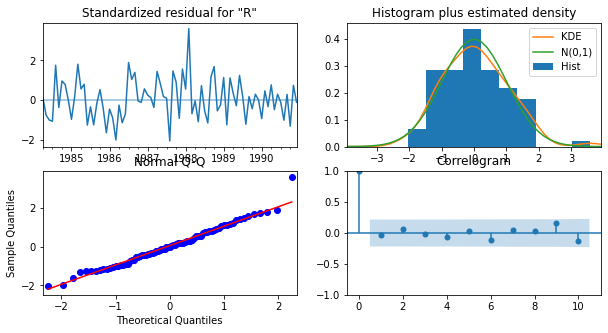

In [1621]:
results_manual_SARIMA_rose.plot_diagnostics();

In [1622]:
sarima_manual_rtest['Predict']=results_manual_SARIMA_rose.forecast(steps=len(sarima_manual_rtest))
sarima_manual_rtest.head()

Rose    Predict
YearMonth                  
1991-01-01  54.0  45.320507
1991-02-01  55.0  61.349954
1991-03-01  66.0  67.241912
1991-04-01  65.0  61.320344
1991-05-01  60.0  67.308133

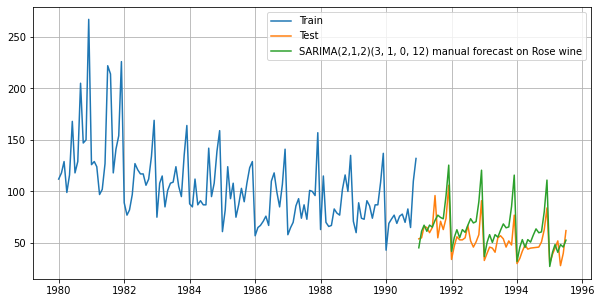

In [1932]:

plt.plot(sarima_manual_rtrain['Rose'], label='Train')
plt.plot(sarima_manual_rtest['Rose'], label='Test')

plt.plot(sarima_manual_rtest['Predict'], label='SARIMA(2,1,2)(3, 1, 0, 12) manual forecast on Rose wine')

plt.legend(loc='best')
plt.grid();

In [1624]:
rmse_model11_rtest = metrics.mean_squared_error(sarima_manual_rtest['Rose'],sarima_manual_rtest['Predict'],squared=False)
print("For SARIMA(2,1,2)(3, 1, 0, 12) manual forecast on the Test Data, RMSE is %3.3f" %(rmse_model11_rtest))

For SARIMA(2,1,2)(3, 1, 0, 12) manual forecast on the Test Data, RMSE is 15.357


In [1625]:
resultsDf_11_rose = pd.DataFrame({'Test RMSE': [rmse_model11_rtest]}
                           ,index=['Rose-SARIMA(2,1,2)(3, 1, 0, 12) manual'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_11_rose])
resultsDf_rose

Test RMSE
Rose-LinearRegression                               15.268955
Rose-NaiveModel                                     79.718773
Rose-SimpleAverageModel                             53.460570
Rose-2pointTrailingMovingAverage                    11.529278
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122
Rose-ARIMA(2,1,3) AIC                               36.812984
Rose-SARIMA(3, 1, 1)(3, 0, 2, 12) AIC               18.881910
Rose-ARIMA(2,1,2) manual                            36.871197
Rose-SARIMA(2,1,2)(3, 1, 0, 12) manual              15.356802

<b>8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1626]:
resultsDf_sparkling.sort_values(by='Test RMSE')

Test RMSE
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   469.767970
Sparkling-TripleExponentialSmoothing-Alpha=0.11...   473.152417
Sparkling-SARIMA(3, 1, 1)(3, 0, 0, 12) AIC           601.140492
Sparkling-SARIMA(0,1,0)(3, 1, 2, 12) manual          601.140492
Sparkling-2pointTrailingMovingAverage                813.400684
Sparkling-4pointTrailingMovingAverage               1156.589694
Sparkling-SimpleAverageModel                        1275.081804
Sparkling-6pointTrailingMovingAverage               1283.927428
Sparkling-ARIMA(2,1,2) AIC                          1299.979640
Sparkling-SimpleExponentialSmoothing-Alpha=0.070    1338.008384
Sparkling-9pointTrailingMovingAverage               1346.278315
Sparkling-LinearRegression                          1389.135175
Sparkling-NaiveModel                                3864.279352
Sparkling-ARIMA(0,1,0) manual                       3864.279352
Sparkling-DoubleExponentialSmoothing-Alpha=0.66...  5291.879833

In [1627]:
resultsDf_rose.sort_values(by='Test RMSE')

Test RMSE
Rose-2pointTrailingMovingAverage                    11.529278
Rose-TripleExponentialSmoothing-Alpha=0.08,Beta...  14.257122
Rose-4pointTrailingMovingAverage                    14.451403
Rose-6pointTrailingMovingAverage                    14.566327
Rose-9pointTrailingMovingAverage                    14.727630
Rose-DoubleExponentialSmoothing-Alpha=0,Beta=0      15.268944
Rose-LinearRegression                               15.268955
Rose-SARIMA(2,1,2)(3, 1, 0, 12) manual              15.356802
Rose-SARIMA(3, 1, 1)(3, 0, 2, 12) AIC               18.881910
Rose-TripleExponentialSmoothing-Alpha=0.065,Bet...  21.019620
Rose-SimpleExponentialSmoothing-Alpha=0.098         36.796241
Rose-ARIMA(2,1,3) AIC                               36.812984
Rose-ARIMA(2,1,2) manual                            36.871197
Rose-SimpleAverageModel                             53.460570
Rose-NaiveModel                                     79.718773

<b>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

<b>Sparkling wine 

In [1657]:
full_data_model_sparkling = ExponentialSmoothing(dfs['Sparkling'], trend='additive', seasonal='additive')
full_data_model_sparkling = full_data_model_sparkling.fit(optimized=True)
full_data_model_sparkling.params

{'smoothing_level': 0.0761188250859012,
 'smoothing_trend': 0.05438010806798877,
 'smoothing_seasonal': 0.3762312949436105,
 'damping_trend': nan,
 'initial_level': 1579.9891770683585,
 'initial_trend': -4.690545983628159,
 'initial_seasons': array([ 105.94461239,   10.9817497 ,  723.56984375,  132.18271564,
        -108.94726499, -202.83394312,  386.00063663,  873.07639675,
         404.11215468, 1016.09273715, 2506.93251613, 3598.8745819 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1658]:
predicted_fulldata_sparkling = full_data_model_sparkling.forecast(steps=12)

In [1659]:
forecast_sparkling = pd.DataFrame({'Sparkling Forecast': predicted_fulldata_sparkling})
date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
forecast_sparkling['Time'] = date
forecast_sparkling.set_index('Time',inplace=True)


std = forecast_sparkling['Sparkling Forecast'].std()
se = (1.96*std)/np.sqrt(len(forecast_sparkling))


forecast_sparkling['lower CI']= forecast_sparkling['Sparkling Forecast'] - se
forecast_sparkling['upper CI']= forecast_sparkling['Sparkling Forecast'] + se
forecast_sparkling


Sparkling Forecast     lower CI     upper CI
Time                                                    
1995-08-31         1869.308465  1084.725597  2653.891334
1995-09-30         2395.901557  1611.318689  3180.484425
1995-10-31         3231.674754  2447.091886  4016.257623
1995-11-30         3910.933211  3126.350342  4695.516079
1995-12-31         6106.418347  5321.835478  6891.001215
1996-01-31         1249.948453   465.365584  2034.531321
1996-02-29         1579.006231   794.423363  2363.589099
1996-03-31         1818.420376  1033.837508  2603.003245
1996-04-30         1792.725965  1008.143097  2577.308834
1996-05-31         1637.530692   852.947823  2422.113560
1996-06-30         1571.584281   787.001412  2356.167149
1996-07-31         1958.453664  1173.870796  2743.036532

In [1936]:
rmse_sparkling = metrics.mean_squared_error(dfs['Sparkling'],full_data_model_sparkling.fittedvalues,squared=False)
print('RMSE of the Full Model for Sparkling wine',rmse_sparkling)

RMSE of the Full Model for Sparkling wine 367.5046391024743


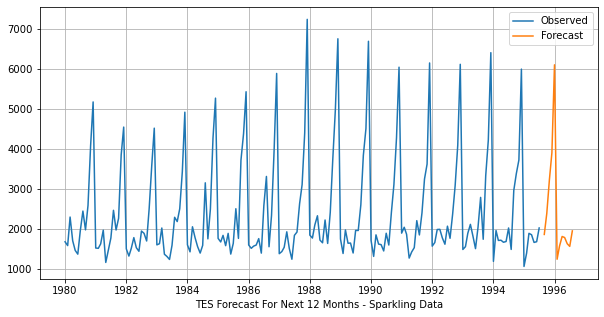

In [1660]:
plt.plot(dfs['Sparkling'], label='Observed')
plt.plot(forecast_sparkling['Sparkling Forecast'], label='Forecast')

plt.legend(loc='best')
plt.xlabel('TES Forecast For Next 12 Months - Sparkling Data')
plt.grid()

<b>Rose wine

In [1651]:
full_data_model_rose = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = full_data_model_rose.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Fri, 09 Dec 2022   AIC                           1193.062
Time:                                    16:36:11   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [1652]:
predicted_manual_SARIMA_full_data_rose = results_full_data_model_rose.get_forecast(steps=12)

In [1933]:
pred_full_manual_SARIMA_date_rose = predicted_manual_SARIMA_full_data_rose.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date_rose.head(12)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083658  12.674047      18.242983      67.924333
1995-09-01  43.341993  12.959866      17.941122      68.742864
1995-10-01  45.827548  12.963865      20.418839      71.236258
1995-11-01  57.397321  13.124632      31.673516      83.121126
1995-12-01  85.074835  13.133466      59.333714     110.815955
1996-01-01  20.731259  13.269497      -5.276477      46.738995
1996-02-01  30.701623  13.284194       4.665080      56.738165
1996-03-01  37.071928  13.401721      10.805037      63.338819
1996-04-01  39.065683  13.421744      12.759548      65.371817
1996-05-01  28.875311  13.525255       2.366298      55.384324
1996-06-01  36.626565  13.550499      10.068074      63.185056
1996-07-01  49.836710  13.643262      23.096408      76.577012

In [1935]:
rmse_rose = metrics.mean_squared_error(dfr['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
print('RMSE of the Full Model for Rose wine',rmse_rose)

RMSE of the Full Model for Rose wine 35.91110673976319


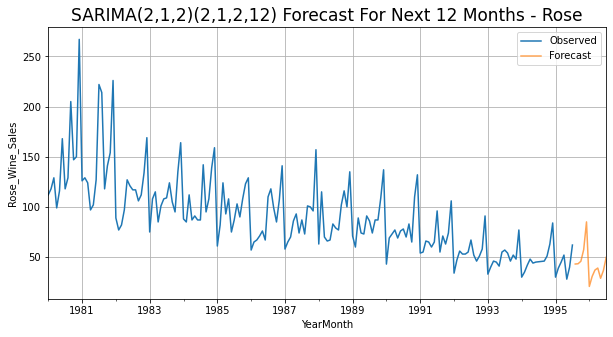

In [1656]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date_rose['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Wine_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast For Next 12 Months - Rose', fontsize=17);